<a href="https://colab.research.google.com/github/Jonashellevang/MBD-JH/blob/master/Weapon_Detection_Using_YOLOv3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# YOLOv3 Object Detector For Detecting Guns - A Full Tutorial

![](https://miro.medium.com/max/1400/1*aSN6LowuFRq2_9iVECf4KA.png)

We followed a tutorial from [Medium](https://medium.com/@quangnhatnguyenle/how-to-train-yolov3-on-google-colab-to-detect-custom-objects-e-g-gun-detection-d3a1ee43eda1) inspired by [AlexeyAB](https://github.com/AlexeyAB/darknet#how-to-train-to-detect-your-custom-objects), which seems to be refered to everywhere when you reasearch about YOLOv3. We also used sources such as [this youtube video](https://www.youtube.com/watch?v=10joRJt39Ns) and [this Google Colab notebook](https://colab.research.google.com/drive/1lTGZsfMaGUpBG4inDIQwIJVW476ibXk_).

## What Is YOLOv3?

You Only Look Once (YOLO) is a neural network made for detecting objects and their location in the image created by [Joseph Redmon](https://www.pjreddie.com/). Yolov3 just means that it is the third verion of YOLO, and it is exciting news that YOLOv4 has already been launched in April 2020, and interestingly enough, not by the guy who built it in the first place! If you want to look further into YOLOv4, you can read the article [here](https://arxiv.org/pdf/2004.10934v1.pdf). If you look closely, you can see that one of the people behind version 4 is [AlexeyAB](https://github.com/AlexeyAB/darknet#how-to-train-to-detect-your-custom-objects) who we linked to above as well.

Object detection is a task in computer vision to detect objects, their location, their magnitude, and what they are. In other words, it is algorithms you use to classify images, is it a cat or a dog? YOLOv3 is in the category of Region Proposal Classification Network (RCNN), but compared to its’ siblings, YOLO looks more like a Fully Convolutional Neural Network (FCNN). It is an algorithm using DarkNet and it is written in C. 

Why do we use YOLO and not either one of the other deep learning algorithms for classifying images?

* YOLOv3 is much faster, where it reaches 45 frames per second, although it is no longer the most accurate where RetinaNet and SSD outperforms its' accuracy.

* Detects multiple objects within the same image.

* Widely used for videos due to its speed.

Each image is associated with a label file saved as .txt file, and to be able to get this we have three options; we can build them from scratch with our own pictures and labels using a tool, we can use already labeled images or we can use pre-trained models. YOLOv3 is basically just another state-of-the-art (SOA), real-time object detection system for images and videos.

## Illustration of YOLOv3 vs. other types of detectors

![Illustration of YOLOv3 vs. other types of detectors](https://www.pjreddie.com/media/image/map50blue.png)

## Pre-Processing And Preparations To Run The Model

Before we get started, we need to make sure that we have installed DarkNet properly, but what is DarkNet? DarkNet is open source neural network framework to train detectors. You can use many different algorithms from there, but here we are only using YOLOv3. 

We decided to download [DarkNet](https://github.com/pjreddie/darknet) to our own computer and do the modifications to the files needed there. This is because it is a more robust and time-consuming way to do it when you have little to no practice with using it. However, you can also do it directly in your Colab notebook!

Don't worry, if you want to run the model yourself without all the tuning, we got you covered with all the settings fixed already uploaded to GitHub with the weapons detection dataset from our [main tutorial guy](https://medium.com/@quangnhatnguyenle/how-to-train-yolov3-on-google-colab-to-detect-custom-objects-e-g-gun-detection-d3a1ee43eda1).

Below we we will guide you through the steps we took for your reference, which you also can try if you want to, and maybe you will learn a thing or two. If you haven't done so already, or maybe you didn't know about this, you should initiate **GPU** by pressing **Runtime**, **Change runtime type**, and select **GPU**. This is for faster computational power, so thank you Google for providing this for us!

Lets continue by importing the GitHub repository to our Google Colaboratory:

## Download The GitHub Repository To Colab

In [0]:
# clone darknet repo
!git clone https://github.com/Jonashellevang/Weapons_Detection_YOLOv3.git

Now you should be able to see a file named ***Weapons_Detection_YOLOv3*** on the left side. Before you move on, you need to rename the file in your Google Colab environment to ***darknet*** for the rest of the code to work!



In [0]:
# List the content of the drive folder darknet
!ls -la "/content/darknet"

total 124
drwxrwxr-x 9 root root  4096 Apr 28 06:18 .
drwxr-xr-x 1 root root  4096 Apr 29 23:56 ..
drwxrwxr-x 2 root root  4096 Apr 28 05:07 cfg
drwxr-xr-x 5 root root  4096 Apr 29 23:22 data
-rw-r--r-- 1 root root 10244 Apr 29 23:22 .DS_Store
drwxrwxr-x 2 root root  4096 Apr 28 05:08 examples
-rw-rw-r-- 1 root root   200 Apr 24 01:15 .gitignore
drwxrwxr-x 2 root root  4096 Apr 24 01:15 include
-rw-rw-r-- 1 root root   515 Apr 24 01:15 LICENSE
-rw-rw-r-- 1 root root   474 Apr 24 01:15 LICENSE.fuck
-rw-rw-r-- 1 root root  6652 Apr 24 01:15 LICENSE.gen
-rw-rw-r-- 1 root root 35141 Apr 24 01:15 LICENSE.gpl
-rw-rw-r-- 1 root root   360 Apr 24 01:15 LICENSE.meta
-rw-rw-r-- 1 root root  1071 Apr 24 01:15 LICENSE.mit
-rw-rw-r-- 1 root root   461 Apr 24 01:15 LICENSE.v1
-rw-rw-r-- 1 root root  3040 Apr 28 05:05 Makefile
drwxrwxr-x 2 root root  4096 Apr 24 01:15 python
-rw-rw-r-- 1 root root   525 Apr 24 01:15 README.md
drwxrwxr-x 2 root root  4096 Apr 24 01:15 scripts
drwxrwxr-x 2 root root  4

In the file you downloaded from GitHub there has been done some modifications to some of the settings of YOLOv3, and these are listed below:

We created a copy of `yolov3.cfg` in the ***cfg*** file and named it `yolov3_custom_train.cfg`. In this file we modified:

```
# Line 8 & 9: 
width = 416, height = 416 
# Line 20 
max_batches = 6000 
# Line 22 
steps = 5400 
#Line 603, 689, 776: 
filters = 18
#Line 610, 696, 783: 
classes = 1
```
What does all of this information mean?

* width and height ...
* max_batches is number of iterations through the process. You might be familiar with it if we say it is known as epochs.
* steps ...
* filters ...
* classes ...

In the file called ***data***, we uploaded the data that we collected from [here](https://www.mediafire.com/file/pvfircmboaelkxc/Gun_data_labeled.zip/file) containing both images and labels. Actually, we didn't just upload it, we replaced the whole file to remove the standard images that was in darknet from when downloading it.

In the file ***data***, we also placed several other files in the ***data*** folder that are needed for our model to run:
* `val.txt` containing our validation data
* `train.txt` containing our training data
* `yolo.names` containing the name of the classes, which in our case is only one name which is ***gun***
* `yolo.data` containing:
```
classes= 1 #number of objects, in our case 1
train  = data/train.txt
valid  = data/val.txt
names = data/yolo.names
backup = backup
```
* There is also a little bug in the code because there are two main pretrained yolo models, one on ms-coco and another on pascal-voc data set. Therefore, to trick the codes, we copied the file `yolo.data` and renamed it to `coco.data` instead of having to re write a whole bunch of code. The reason for this is because most of the code is tailored to the ms-coco dataset, so here we fooled the system!







## Connecting Colab with Google Drive folder

For robustness and safety of your model, connecting to Google Drive makes you able to save different things as you go and not loose it, as Colab automatically removes your files after **12 hours**. To be able to connect to drive, run the below code and open the link it provides you. Follow by copying the authorization code it gives you, and paste it in the little box that will pop up below the code.

In [0]:
# Connecting to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Checkin Your GPU Compatibility With CUDA

This headline might not tell you much, but CUDA is what darknet runs on with GPU. Therefore you need to make sure that your GPU is up to date with the right version! You do that with the code below. If you don't have the right version of CUDA (which you probably do), take a look at this [guide](https://medium.com/repro-repo/install-cuda-and-cudnn-for-tensorflow-gpu-on-ubuntu-79306e4ac04e) to fix the issue.

In [0]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


## Download Pretrained Convolutional Weights
For training we use convolutional weights that are pre-trained on Imagenet. We get this by running the command below to collect it from the creator of YOLO's webpage. This might take some time, so now is a great time to grab a coffee or do the dishes.

In [0]:
%cd darknet
!wget https://pjreddie.com/media/files/darknet53.conv.74

/content/darknet
--2020-04-28 14:52:16--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M   178KB/s    in 24m 17s 

2020-04-28 15:16:35 (109 KB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



## Compile Darknet Directory
If English isn't your first language, or you are new to programming, you might not really know what this means or what it does. To help you out, [this source](https://www.computerhope.com/jargon/c/compile.htm) had a good explanation for it:

"Compile is the process of creating an executable program from code written in a compiled programming language. Compiling allows the computer to run and understand the program without the need of the programming software used to create it."

If you are still curious to understand more, don't be shy, just click the link above.

In [0]:
%cd /content/darknet 
!make
!chmod +x ./darknet

## Save Weight During Training In Your Google Drive 

This step is important since Colab environment will be recycled after **12 hours** and all files locate in its working space will be deleted. Here you define a symbolic link to save the weight directly into your **backup** folder which you created in our Google Drive before. In our case, our **backup** folder directory is **My Drive/backup**.

In [0]:
!rm /content/darknet/backup -r
!ln -s /content/drive/'My Drive'/backup /content/darknet

## Install dos2unix To Convert train.txt, val.txt, yolo.data, yolo.names, yolov3_custom_train.cfg and coco.names to unix

`dos2unix` is a Linux code to convert plain text files to the Linux format unix, which basically just fixes the line ending of text files, making it clean and ready to go. For more thurough explanation check out [Lifewire](https://www.lifewire.com/dos2unix-linux-command-4091910)!

In [0]:
!sudo apt install dos2unix

In [0]:
!dos2unix ./data/train.txt
!dos2unix ./data/val.txt
!dos2unix ./data/yolo.data
!dos2unix ./data/yolo.names
!dos2unix ./cfg/yolov3_custom_train.cfg

# we have a file in here, coco.names, that is included because of a bug in the code we can't correct
# therefore, we also need to modify this one to be able to use it. This file is a 100 % copy of the
# file yolo.names, and are only here because we couldn't find where to replace it in the code
!dos2unix ./data/coco.names

dos2unix: converting file ./data/train.txt to Unix format...
dos2unix: converting file ./data/val.txt to Unix format...
dos2unix: converting file ./data/yolo.data to Unix format...
dos2unix: converting file ./data/yolo.names to Unix format...
dos2unix: converting file ./cfg/yolov3_custom_train.cfg to Unix format...
dos2unix: converting file ./data/coco.names to Unix format...


In [0]:
# verify that train.txt can be seen in our darknet/data folder
!ls data/

coco.names  labels	 train.txt  yolo.data
images	    test_images  val.txt    yolo.names


## Training Your Model

By default, YOLOv3 only displays objects detected with a confidence of .25 or higher. You can change this by passing the -thresh <val> flag to the yolo command. We did not change this as we didn't see any reason to change the treshold, but it is nice to know it is an option.

When you run the code, it will take a couple hours! If you don't feel like doing that, you can download our backup folder to your Google Drive and paste the files into the folder you created earlier named ***backup***. To do so, follow [this link](http://www.mediafire.com/folder/3ltw01onysg9i/Backup_Folder_Weapon_Detection)! Not only does this save you hours and hours of computational power (and maybe frustration), but also gets your ready to see the results of this model in action!

In [0]:
# Train your model with this code
%cd /content/darknet
!./darknet detector train data/yolo.data cfg/yolov3_custom_train.cfg darknet53.conv.74

### Errors with Initial Training
In the beginning we ran into some errors here, and this was due to the pre-settings of our model. We will guide you through these errors so you don't encounter the same!

1. We managed to run the model but it stopped and couldn't initiate the server. Why? It was as simple as not including `darknet53.conv.74` into the darknet folder that we created earlier. This has to be included, or else you don't have any weights to run the model on.

2. We misunderstood the tutorial we followed ([click here for tutorial](https://medium.com/@quangnhatnguyenle/how-to-train-yolov3-on-google-colab-to-detect-custom-objects-e-g-gun-detection-d3a1ee43eda1)), and did not download darknet into our computer, followed by .zip filing it and upload it to the filestructure in colab. When this was discovered, the whole process gave a lot less headaches, and turned out to be fun! We saved you from this burden, and you can just run everything we have done for you with peace in your mind by collecting the GitHub repository as you did earlier.

3. we got the error:
```
CUDA Error: no CUDA-capable device is detected 
darknet: ./src/cuda.c:36: check_error: Assertion `0' failed.
```
This had a very simple solution, and it did not demand anything more than closing down all the different Colab files we had created during the process, still connected to the GPUs, because these took up processing power! This, combined with some sleep, made us able to run through the code without any more pain, which gave us the resulting model we now have.

In [0]:
# This stops 'Run all' at this cell by causing an error
assert False

## The Code You Need To Reconnect

You don't need to scroll up and change the code to be able to run from where you left of. We have gathered all the code that you need for you! We will only summarize them once here, so if you need to connect another time even after it stopped training, and before you got to test, scroll back up here. Keep in mind that this code actually is mentioned once more further down in the notebook, but this is due to an issue with saving the test files. Therefore we have another GitHub repository with different files, but you will see this further down when you reach that far.

In [0]:
# clone darknet repo
!git clone https://github.com/Jonashellevang/Weapons_Detection_YOLOv3.git

Cloning into 'Weapons_Detection_YOLOv3'...
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 5905 (delta 0), reused 1 (delta 0), pack-reused 5900
Receiving objects: 100% (5905/5905), 240.68 MiB | 39.73 MiB/s, done.
Resolving deltas: 100% (77/77), done.
Checking out files: 100% (6215/6215), done.
fatal: unable to write new index file
You can inspect what was checked out with 'git status'
and retry the checkout with 'git checkout -f HEAD'



Before you move on, you again need to rename your file that was named ***Weapons_Detection_YOLOv3*** in your Google Colab environment to ***darknet*** for the rest of the code to work!

In [0]:
# Re-connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# List the content of the drive folder darknet
!ls -la "/content/darknet"

total 124
drwxr-xr-x 10 root root  4096 Apr 30 00:57 .
drwxr-xr-x  1 root root  4096 Apr 30 00:58 ..
drwxr-xr-x  2 root root  4096 Apr 30 00:57 cfg
drwxr-xr-x  5 root root  4096 Apr 30 00:57 data
-rw-r--r--  1 root root 10244 Apr 30 00:57 .DS_Store
drwxr-xr-x  2 root root  4096 Apr 30 00:57 examples
drwxr-xr-x  8 root root  4096 Apr 30 00:57 .git
drwxr-xr-x  2 root root  4096 Apr 30 00:57 include
-rw-r--r--  1 root root   515 Apr 30 00:57 LICENSE
-rw-r--r--  1 root root   474 Apr 30 00:57 LICENSE.fuck
-rw-r--r--  1 root root  6652 Apr 30 00:57 LICENSE.gen
-rw-r--r--  1 root root 35141 Apr 30 00:57 LICENSE.gpl
-rw-r--r--  1 root root   360 Apr 30 00:57 LICENSE.meta
-rw-r--r--  1 root root  1071 Apr 30 00:57 LICENSE.mit
-rw-r--r--  1 root root   461 Apr 30 00:57 LICENSE.v1
-rw-r--r--  1 root root  3040 Apr 30 00:57 Makefile
drwxr-xr-x  2 root root  4096 Apr 30 00:57 python
-rw-r--r--  1 root root   525 Apr 30 00:57 README.md
drwxr-xr-x  2 root root  4096 Apr 30 00:57 scripts
drwxr-xr-x  

In [0]:
# Compile darknet directory
%cd /content/darknet 
!make
!chmod +x ./darknet

In [0]:
# Connecting the backup folders together to have your backups not only in the drive folder, 
# but also in the darknet folder
!rm /content/darknet/backup -r
!ln -s /content/drive/'My Drive'/backup /content/darknet

!sudo apt install dos2unix
!dos2unix ./data/train.txt
!dos2unix ./data/val.txt
!dos2unix ./data/yolo.data
!dos2unix ./data/yolo.names
!dos2unix ./cfg/yolov3_custom_train.cfg

# we have a file in here, coco.names, that is included because of a bug in the code we can't correct.
# Therefore, we also need to modify this one to be able to use it. This file is a 100 % copy of the
# file yolo.names, and are only here because we couldn't find where to replace it in the code
!dos2unix ./data/coco.names

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  dos2unix
0 upgraded, 1 newly installed, 0 to remove and 25 not upgraded.
Need to get 351 kB of archives.
After this operation, 1,267 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 dos2unix amd64 7.3.4-3 [351 kB]
Fetched 351 kB in 0s (4,146 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package dos2unix.
(Reading database ... 144568 files and directories curr

## Retrain YOLOv3 Model From Where You Left Off

It is a known fact that colab only runs for **12 hours at a time connected to the GPU**, and this we have to take advantage of. We have set up a backup folder where every 100 Epoch is saved into (which you probably remember and hopefully have downloaded and uploaded to your Google Drive), and whenever your Colab file decide to stop, you can finish where you left of using the below code. Here, the only difference of the initial code above to train our model, we include `backup/yolov3_custom_train_4000.weights` instead of `darknet53.conv.74`. Everything else is the same! This code directs you to your saved weight, and in this case the 4000th epoch/batch, where it can continue to run the process. How do we know when to do this? There can be many reasons why, but for us we got the message: `Buffered data was truncated after reaching the output size limit`. An example of this error can be viewed here:
![](https://raw.githubusercontent.com/Jonashellevang/Weapons_Detection_YOLOv3/master/Screenshot%202020-04-28%20at%2022.22.08.png)

On [Stackoverflow](https://stackoverflow.com/questions/51463383/buffered-data-was-truncated-after-reaching-the-output-size-limit), the reason for this error is described as follows:

"Even if RAM | GPU | DISK on colab is free, this error still comes because there is a limited memory for displaying output of a cell on colab. Assuming the memory limit is around 2Mb to 5Mb when we run many epochs(148+) during training, it tends to fill that memory and hence the output is truncated because there is no more memory left free to display the buffered epochs. However, the machine keeps running in the background and the output is processed but it is not displayed because of the buffered limit. You will still get your desired output"

If you didn't want to train from the beginning, you can train the next 2000 batches from here, or, you can still skip this and move directly to testing.

In the [backup folder we provided to you](http://www.mediafire.com/folder/3ltw01onysg9i/Backup_Folder_Weapon_Detection), we only included the `yolov3_custom_train_4000.weights` to train from there, and the `yolov3_custom_train_final.weights` which is the finished pre-trained model if you only want to test the model. If you still haven't done so, make shure to download these files into your folder you named ***backup*** in Google Drive. This should already be connected to your Colab environment.

In [0]:
# train your custom detector
!./darknet detector train data/yolo.data cfg/yolov3_custom_train.cfg backup/yolov3_custom_train_4000.weights

## Evaluating Performance With Test/Validation Results

You made it this far! Good job! Now comes the tricky part full of errors! We don't know why, but the [GitHub repository to pjreddie is full of the same error](https://github.com/pjreddie/darknet/issues?page=1&q=cannot+load+image) that we have been dealing with, which we are going to help you navigate through to at least see the effect of your model, because it does work, and it is really cool! In his [repo](https://github.com/pjreddie/darknet) you can see that he writes several places "GUYS I THINK MAYBE IT WAS BROKEN ON OPENCV IDK", so this bug seems to be for everyone.

However, we got a treat for you that is going to make your life much easier, if you want to! Below we have found a way to trick the system (not really) by importing another GitHub repository! This has also been modified, so for those interested, life just got easier!


### Define Helping Functions

We will start off by defining some helping functions thanks to this [this guy](https://github.com/ivangrov/YOLOv3-GoogleColab/blob/master/YOLOv3_GoogleColab.ipynb)! This is to get all the information you can get out of your code. In the code below, we have defined 3 helping functions to:
1. Show the predicted image
2. Upload files to Colab
3. Download files from your notebook

However, you will most likely not use the second one since it is much easier to just upload directly to the Colab environment.

In [0]:
# define helper functions

# Use this to show images
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# Use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# Use this to download files  
def download(path):
  from google.colab import files
  files.download(path)

### Testing on Images

We choose to test our model on four images to demonstrate how it works and that you can actually get some accurate results. We took two images from our validation dataset, but also included two images of Dwight and Jonas holding a banana. Will our model be able to see the difference?

In [0]:
# run your custom detector with this command (thresh flag sets accuracy that detection must be in order to show it)
!./darknet detector test data/yolo.data cfg/yolov3_custom_train.cfg backup/yolov3_custom_train_final.weights data/test_images/gun1.jpg -thresh 0.3

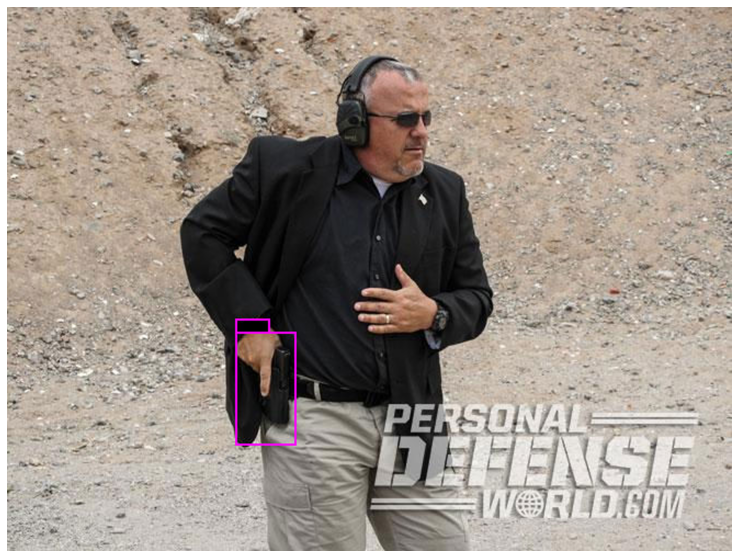

In [0]:
# Now we use one of the helping functions to show the image that was just created
imShow('predictions.jpg')

In [0]:
download('predictions.jpg')

WOW, look at that, data science is cool! We have here seen that our model have actually been able to detect this gun. It does so with a confidence of 77 %! Let's try with another image where we have a gun!

In [0]:
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
!./darknet detector test data/yolo.data cfg/yolov3_custom_train.cfg backup/yolov3_custom_train_final.weights data/test_images/gun2.jpg -thresh 0.3

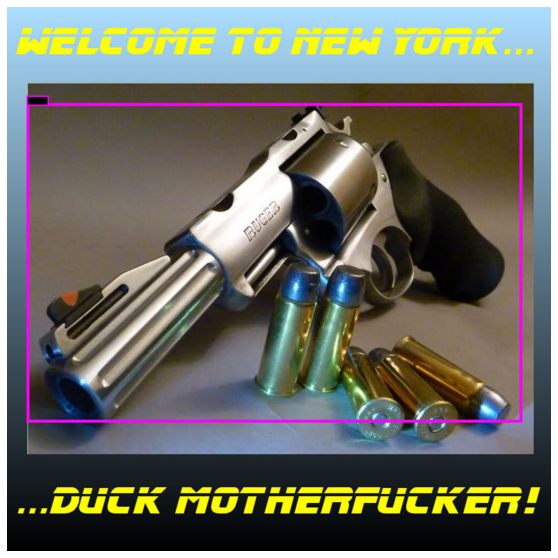

In [0]:
# Now we use one of the helping functions to show the image that was just created
imShow('predictions.jpg')

And our model does it again! Here, our trained model, predicts that there is a gun inside the square with a 89 % confidence.

In [0]:
download('predictions.jpg')

Below we will try with our banana pictures:

In [0]:
# run your custom detector with this command (thresh flag sets accuracy that detection must be in order to show it)
!./darknet detector test data/yolo.data cfg/yolov3_custom_train.cfg backup/yolov3_custom_train_final.weights data/test_images/banana1.jpg -thresh 0.3

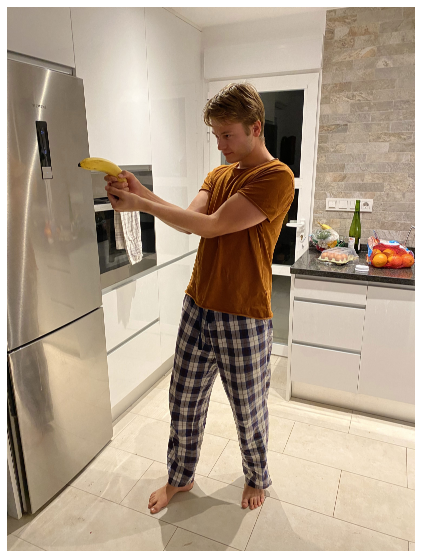

In [0]:
# Now we use one of the helping functions to show the image that was just created
imShow('predictions.jpg')

In [0]:
download('predictions.jpg')

And yet again, our model does it right! We have now seen that even though Jonas is holding a banana like a gun, our model is smart enough to see that this is not a gun. The position he has, is in this case not affecting the model to think it is a gun.

Over to a little bit more serious topic, we wanted to check our racial bias of our gun detection model. In the next photo, Dwight, who has a darker skintone than Jonas, will hold the banana, and now we are going to see wether the model we created is biased or not! If you are curious as to why we did it, the reason can be found [here](https://algorithmwatch.org/en/story/google-vision-racism/) where Google has appologized for its' biased algorithm to say the skintone has an effect on the model they have created.

In [0]:
# run your custom detector with this command (thresh flag sets accuracy that detection must be in order to show it)
!./darknet detector test data/yolo.data cfg/yolov3_custom_train.cfg backup/yolov3_custom_train_final.weights data/test_images/banana2.jpg -thresh 0.3

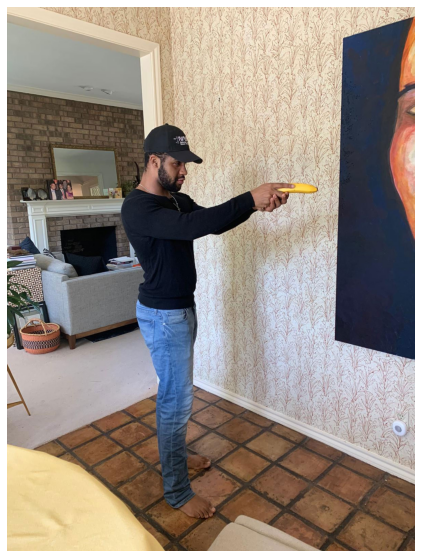

In [0]:
# Now we use one of the helping functions to show the image that was just created
imShow('predictions.jpg')

In [0]:
download('predictions.jpg')

And the algorithm did it again! We are happy to see that our model has not changed its view on holding a banana because of the skintone. Maybe Google should hire us to fix their issue with bias 🙊

The code below creates a file to your **result** folder located in ***/content/darknet/result***. We have named it "predictions_" in the code, but it automatically adds the class word to it, so in our case it adds "gun.txt", the whole file should be named "predictions_gun.txt"

In [0]:
!./darknet detector valid data/yolo.data cfg/yolov3_custom_train.cfg backup/yolov3_custom_train_final.weights -out predictions_

results: Using default 'results'
layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32 0.299 BF
   1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64 1.595 BF
   2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32 0.177 BF
   3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128 1.595 BF
   6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
   7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
  10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256 1.595 BF
  13 conv    128  1 x 1 / 1    52 x  52 x 256   -> 

## Batch Downloading Of Your Predictions

After some research we found that it is in fact possible to run and classify images in batches, and to do this we had to download another [GitHub repo](https://darknet.gong.im/). Below is the steps you need to take to do the same:

1. In Colab, press **Runtime** in the toolbar, and press **Factory reset runtime**. This is to clear the space of Colab, and be ready to run the new files!
2. Clone the GitHub repository below to be able to download batches of your prediction. This repo has everything done for you, so all you need to do is to clone it to Colab. Yes, if you were worried about it for a second, all the files from the previous modification we did has been moved over to this GitHub repository as well.
3. Reconnect to Google Drive and run all the other codes to reconnect everything like you did in the beginning. All the code is provided below as well.




In [1]:
# clone darknet repository
!git clone https://github.com/Jonashellevang/Weapons_Detection_YOLOv3_2.git

Cloning into 'Weapons_Detection_YOLOv3_2'...
remote: Enumerating objects: 304, done.
remote: Counting objects: 100% (304/304), done.
remote: Compressing objects: 100% (260/260), done.
remote: Total 304 (delta 37), reused 304 (delta 37), pack-reused 0
Receiving objects: 100% (304/304), 13.19 MiB | 6.29 MiB/s, done.
Resolving deltas: 100% (37/37), done.


### The Code You Need To Reconnect
As before, run all of this code to reconnect to your Google Drive:

In [2]:
# Re-connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


STOP! Remember what you did all the other times when uploading a GitHub repository? You guessed it, for the rest of the code to work, you need to rename your file from **Weapons_Detection_YOLOv3_2** to ***darknet*** once again!



In [3]:
# List the content of the drive folder darknet
!ls -la "/content/darknet"

total 928
drwxr-xr-x 9 root root   4096 Apr 30 21:01 .
drwxr-xr-x 1 root root   4096 Apr 30 21:02 ..
drwxr-xr-x 5 root root   4096 Apr 30 21:01 3rdparty
drwxr-xr-x 3 root root   4096 Apr 30 21:01 build
drwxr-xr-x 2 root root   4096 Apr 30 21:01 .circleci
-rw-r--r-- 1 root root     16 Apr 30 21:01 CNAME
-rw-r--r-- 1 root root    172 Apr 30 21:01 command.txt
-rw-r--r-- 1 root root    252 Apr 30 21:01 _config.yml
-rw-r--r-- 1 root root  15850 Apr 30 21:01 darknet.py
drwxr-xr-x 3 root root   4096 Apr 30 21:01 exp
drwxr-xr-x 8 root root   4096 Apr 30 21:01 .git
-rw-r--r-- 1 root root     66 Apr 30 21:01 .gitattributes
-rw-r--r-- 1 root root    283 Apr 30 21:01 .gitignore
-rw-r--r-- 1 root root    108 Apr 30 21:01 image_yolov2.sh
-rw-r--r-- 1 root root    110 Apr 30 21:01 image_yolov3.sh
-rw-r--r-- 1 root root    515 Apr 30 21:01 LICENSE
-rw-r--r-- 1 root root   4544 Apr 30 21:01 Makefile
-rw-r--r-- 1 root root    245 Apr 30 21:01 mjpeg_stream.sh
-rw-r--r-- 1 root root    160 Apr 30 21:01 ne

We see here that the file containing the data is for some reason not included here. Therefore, the backup solution for now has been to upload it to the same file sharing site as we did with the backup folder. To get it, go to [this link](http://www.mediafire.com/file/kyx73kryo2735fh/data.zip), save it to your drive, and move the file manually over to your darknet folder. Once you have uploaded the .zip file to your drive, unzip it with the code below:

In [0]:
!unzip "/content/drive/My Drive/data.zip"

Now, move the ***data*** folder over to your ***darknet*** folder

In [0]:
# Compile darknet directory
%cd /content/darknet 
!make
!chmod +x ./darknet

In [6]:
# Connecting the backup folders together to have your backups not only in the drive folder, 
# but also in the darknet folder
!rm /content/darknet/backup -r
!ln -s /content/drive/'My Drive'/backup /content/darknet

!sudo apt install dos2unix
!dos2unix ./data/train.txt
!dos2unix ./data/val.txt
!dos2unix ./data/yolo.data
!dos2unix ./data/yolo.names
!dos2unix ./cfg/yolov3_custom_train.cfg

# we have a file in here, coco.names, that is included because of a bug in the code we can't correct
# therefore, we also need to modify this one to be able to use it. This file is a 100 % copy of the
# file yolo.names, and are only here because we couldn't find where to replace it in the code
!dos2unix ./data/coco.names

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  dos2unix
0 upgraded, 1 newly installed, 0 to remove and 25 not upgraded.
Need to get 351 kB of archives.
After this operation, 1,267 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 dos2unix amd64 7.3.4-3 [351 kB]
Fetched 351 kB in 2s (201 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package dos2unix.
(Reading database ... 144568 files and directories curren

In [0]:
# Did not work here, but left it because it is easy to fix, but have to do that later because there was not enough time
!./darknet detector map data/yolo.data src/yolov3_custom_train.cfg backup/yolov3_custom_train_final.weights -iou_thresh 0.75

In [0]:
# Did not work here, but left it because it is easy to fix, but have to do that later because there was not enough time
!./darknet detector recall data/yolo.data src/yolov3_custom_train.cfg backup/yolov3_custom_train_final.weights

In [0]:
# To save your images in batches
!./darknet detector batch data/yolo.data cfg/yolov3_custom_train.cfg backup/yolov3_custom_train_final.weights batch exp/in_images/ /content/drive/'My Drive'/out_images/predicted_ > exp/results/results.txt

In [0]:
# With this code you can download the batch file of the results to your computer
download('/content/darknet/exp/results/results.txt')

## Tips!

1. Our Colab kept disconnecting after a little while, and the way to solve this is by setting a javascript interval to click on the connect button every 60 seconds. If you are using a mac like us, the way to do this is by clicking `Cmd + option + i`, press console, and paste this code into the typing field:
```
function ConnectButton(){
    console.log("Connect pushed"); 
    document.querySelector("#top-toolbar > colab-connect-button").shadowRoot.querySelector("#connect").click() 
}
setInterval(ConnectButton,60000);
```
2. Not that related at all, but if you need to clear the content of a folder as well as remove the folder itself, this code does it for you: `!rm -d -r /content/darknet/data`